# D206

## Introduction

In the telecommunications industry, customers can choose from multiple service providers
and actively switch from one provider to another. Customer “churn” is defined as the
percentage of customers who stopped using a provider’s product or service during a certain
time frame. In this highly competitive market, some telecommunications industries can
experience average annual churn rates as high as 25 percent. Given that it costs 10 times
more to acquire a new customer than to retain an existing one, customer retention has now
become even more important than customer acquisition.
For many providers, retaining highly profitable customers is the number one business goal.
To reduce customer churn, telecommunications companies need to predict which customers
are at high risk of churn.
You are an analyst on a team of analysts in a popular telecommunications company, which
serves customers in all regions of the United States. You have been asked to clean the raw
data set in preparation to explore the data, identify trends, and compare key metrics.


In [1]:
# Import Libraries and magic words

import pandas as pd
import numpy as np


import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from helper import *
%matplotlib inline
import random
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Setting some options
pd.set_option('display.max_columns', None) #this ensures dataframes are not truncated
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib") #This notebook shouldn't take enough memory to need matplotlib warnings

In [3]:
os.listdir()

['churn_clean.csv',
 'churn_raw_data.csv',
 'Churn_scaled_data.csv',
 'D206 Data Cleaning_Churn Data Consideration and Dictionary.pdf',
 'helper.py',
 'read.me',
 'WGUd206.html',
 'WGUd206.ipynb',
 'WGUd206.pdf',
 '__pycache__']

## Part I: Research Question

### A.  Describe one question or decision that you will address using the data set you chose. The summarized question or decision must be relevant to a realistic organizational need or situation.

<p>A dataset was provided from a US telecom provider to begin building insights into their customer base. Understanding what features contribute most toward knowledge in the dataset is essential in order to build models and make recommendations. This will help preprare for the subsequent reserach question: "Which customers are ,more liekly to churn?". </p>


### B.  Describe the variables in the data set and indicate the specific type of data being described. Use examples from the data set that support your claims.


The dataset provided is 10,000 observations by 50 features. The dataset came with a data dictionary which is attached. For this analysis, all categorical, binary and numerical data not corresponding to location was used. This means the only features removed are as follows:

| Variable    | Type        | Description                                                                |
|-------------|-------------|----------------------------------------------------------------------------|
| CaseOrder   | Categorical | A placeholder variable to preserve the original order of the raw data file  |
| Customer_id | Categorical | Unique customer ID                                                         |
| Interaction | Categorical | Unique IDs related to customer transactions, technical support, and sign-ups|
| City        | Categorical | Customer city of residence as listed on the billing statement              |
| State       | Categorical | Customer state of residence as listed on the billing statement             |
| County      | Categorical | Customer county of residence as listed on the billing statement            |
| Zip         | Categorical | Customer zip code of residence as listed on the billing statement          |
| Lat         | Categorical | Latitude coordinate of customer residence as listed on the billing statement|
| Lng         | Categorical | Longitude coordinate of customer residence as listed on the billing statement|
| Area        | Categorical | Area type (rural, urban, suburban), based on census data                   |

The following items in the dataset are categorical features included in the dataset

| Variable           | Type        | Description                                                                                           |
|--------------------|-------------|-------------------------------------------------------------------------------------------------------|
| TimeZone           | Categorical | Time zone of customer residence based on customer’s sign-up information                               |
| Job                | Categorical | Job of the customer (or invoiced person) as reported in sign-up information                           |
| Education          | Categorical | Highest degree earned by customer as reported in sign-up information                                  |
| Employment         | Categorical | Employment status of customer as reported in sign-up information                                      |
| Marital            | Categorical | Marital status of customer as reported in sign-up information                                         |
| Gender             | Categorical | Customer self-identification as male, female, or nonbinary                                            |
| Churn              | Categorical | Whether the customer discontinued service within the last month (yes, no)                             |
| Techie             | Categorical | Whether the customer considers themselves technically inclined (based on customer questionnaire) (yes, no)|
| Contract           | Categorical | The contract term of the customer (month-to-month, one year, two year)                                |
| Port_modem         | Categorical | Whether the customer has a portable modem (yes, no)                                                   |
| Tablet             | Categorical | Whether the customer owns a tablet such as iPad, Surface, etc. (yes, no)                              |
| InternetService    | Categorical | Customer’s internet service provider (DSL, fiber optic, None)                                         |
| Phone              | Categorical | Whether the customer has a phone service (yes, no)                                                    |
| Multiple           | Categorical | Whether the customer has multiple lines (yes, no)                                                     |
| OnlineSecurity     | Categorical | Whether the customer has an online security add-on (yes, no)                                          |
| OnlineBackup       | Categorical | Whether the customer has an online backup add-on (yes, no)                                            |
| DeviceProtection   | Categorical | Whether the customer has device protection add-on (yes, no)                                           |
| TechSupport        | Categorical | Whether the customer has a technical support add-on (yes, no)                                         |
| StreamingTV        | Categorical | Whether the customer has streaming TV (yes, no)                                                       |
| StreamingMovies    | Categorical | Whether the customer has streaming movies (yes, no)                                                   |
| PaperlessBilling   | Categorical | Whether the customer has paperless billing (yes, no)                                                  |
| PaymentMethod      | Categorical | The customer’s payment method (electronic check, mailed check, bank (automatic transfer), credit card (automatic)) |

<p>The following variables represent response to an eight-question survey asking customers to rate the importance of various factors/surfaces on a scale of 1 to 8 (1 = most important, 8 = least important)
•	Item1 (categorical): Timely response
•	Item2 (categorical): Timely fixes
•	Item3 (categorical): Timely replacements
•	Item4 (categorical): Reliability
•	Item5 (categorical): Options
•	Item6 (categorical): Respectful response
•	Item7 (categorical): Courteous exchange
•	Item8 (categorical): Evidence of active listening </p>




The following features were used to weigh principal components in the analysis:

| Variable              | Type    | Description                                                                                               |
|-----------------------|---------|-----------------------------------------------------------------------------------------------------------|
| Population            | Numeric | Population within a mile radius of customer, based on census data                                         |
| Children              | Numeric | Number of children in customer’s household as reported in sign-up information                             |
| Age                   | Numeric | Age of customer as reported in sign-up information                                                        |
| Income                | Numeric | Annual income of customer as reported at time of sign-up                                                  |
| Outage_sec_perweek    | Numeric | Average number of seconds per week of system outages in the customer’s neighborhood                       |
| Email                 | Numeric | Number of emails sent to the customer in the last year (marketing or correspondence)                      |
| Contacts              | Numeric | Number of times customer contacted technical support                                                      |
| Yearly_equip_failure  | Numeric | The number of times customer’s equipment failed and had to be reset/replaced in the past year              |
| Tenure                | Numeric | Number of months the customer has stayed with the provider                                                |
| MonthlyCharge         | Numeric | The amount charged to the customer monthly. This value reflects an average per customer.                  |
| Bandwidth_GB_Year     | Numeric | The average amount of data used, in GB, in a year by the customer                                         |


## Part II: Data-Cleaning Plan

### C.  Explain the plan for cleaning the data by doing the following:


#### 1.  Propose a plan that includes the relevant techniques and specific steps needed to identify anomalies in the data set.


Phase 1 - Data Assessment

Using common Python libraries for descriptive statistics and visualization, data will be assessed for:

1. **Appropriate Typing:**
   - Using Pandas `info()` method will show feature typing.

2. **Missing Values:**
   - Using Pandas `info()` method, an overview of the original file’s columns will be displayed with the count of observations for each feature.

3. **Duplicate Values:**
   - Using the Pandas `duplicated()` method, a sum of identical rows will be documented.

4. **Numerical Distribution:**
   - Using Matplotlib histograms and box-and-whisker plots, unclean data will be visualized.

5. **Categorical Accuracy:**
   - Assessment of categorical column inputs will be conducted to determine if updates are necessary. It will also include recommendations for encoding items via Scikit-learn's One-Hot Encoding (binary and multivariate) for potential future machine learning use.

6. **Outlier Detection:**
   - Ensure input values make sense and correct outliers. For example, there should be no negative numbers in this dataset based on the descriptions in the data dictionaries.

These are standard data assessment procedures (Yıldırım, 2020).

### Phase 2 - Data Cleaning

Data will be cleaned using Pandas by:

1. **Imputing Missing or Negative Values:**
   - Missing values imputation:
     - **Numerical data** will be cleaned based on its distribution, explored through descriptive statistics and visualizations.
     - For **normal or even distributions**, random sampling from the dataset will be used as a standard practice (Kumar, 2021).
     - For **bimodal data**, the median of each mode will be used for imputation to minimize risk and variance (IBM, 2021).
     - **Negative values** in time data will be set to 0.
     - Note: While K-Nearest Neighbors (KNN) could potentially fill missing data accurately, it will not be used due to the dataset's high dimensionality and large scale differences.

2. **Removing Duplicate Rows:**
   - Duplicate rows will be dropped.

3. **Scaling Data:**
   - Data will be scaled using Scikit-Learn's `RobustScaler`.

4. **Categorical Accuracy:**
   - Assessment of categorical column inputs will be conducted to determine if updates are necessary. It will also include recommendations for encoding items via Scikit-learn's One-Hot Encoding (binary and multivariate).

#### 2.  Justify your approach for assessing the quality of the data, include:

##### The characteristics of the data being assessed:

The dataset has mixed features, often self reported by the customer for categories and some discrete data. For example, income is self reported for the data and therefore correcting for outliers is not possible without another dataset to compare against. Also, categories such as `Techie` and `TechSupport` having missing values speaks to data collection process having major errors from the firm. Every dataset should have direct knowledge on whether a customer has purchased a service or not.

##### The approach used to assess the quality:

Using graphic visualization via Seaborn as well as descriptive stats via standard Pandas tools is the standard approach for initial exploration.

#### 3.  Justify your selected programming language and any libraries and packages that will support the data-cleaning process.

Python is the most used programming language for analysis computation as of writing this. With its robust package selection, statistics, machine learning and ease of use make it an ideal candidate for this type of analysis work. The JupyterNotebook is a data science and analytics industry standard for human-readable code and experiment reproducibility. Pandas allows working with Dataframes and is the foundational method I use to explore this dataset.

#### 4.  Provide the code you will use to identify the anomalies in the data.
### Initial Exploration

This section servers as a playground using different exploratory options to help identify data issues.
Not every issue found will have a cell but there will be a documented section below some of the more overarching
and larger calls will be displayed below.

In [4]:
#Read in Dataset
raw_churn = pd.read_csv('churn_raw_data.csv')

In [5]:
# Dimensions
raw_churn.shape

(10000, 52)

In [6]:
# Defualt ordering column
raw_churn.index

RangeIndex(start=0, stop=10000, step=1)

In [7]:
# Pandas dataset descriptor
raw_churn.info() # Note data type anomalies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

1. Unused empty column
2. `CaseOrder` should be index
3. `Zip`/`Lat`/`Lang` should be string/panda objects
4. Columns missing data: `Children`, `Age`, `Income`, `Techie`, `Phone`, `TechSupport`, `Tenure`, `Bandwidth-GB-Year`
5. Survey `item` header is non descript

In [8]:
# Descriptive stats to detect data anomalies in numeric columns
with pd.option_context('display.max_columns', 40):
    print(raw_churn.describe(include = [np.number]))

        Unnamed: 0    CaseOrder           Zip           Lat           Lng  \
count  10000.00000  10000.00000  10000.000000  10000.000000  10000.000000   
mean    5000.50000   5000.50000  49153.319600     38.757567    -90.782536   
std     2886.89568   2886.89568  27532.196108      5.437389     15.156142   
min        1.00000      1.00000    601.000000     17.966120   -171.688150   
25%     2500.75000   2500.75000  26292.500000     35.341828    -97.082812   
50%     5000.50000   5000.50000  48869.500000     39.395800    -87.918800   
75%     7500.25000   7500.25000  71866.500000     42.106908    -80.088745   
max    10000.00000  10000.00000  99929.000000     70.640660    -65.667850   

          Population     Children          Age         Income  \
count   10000.000000  7505.000000  7525.000000    7510.000000   
mean     9756.562400     2.095936    53.275748   39936.762226   
std     14432.698671     2.154758    20.753928   28358.469482   
min         0.000000     0.000000    18.000000

6. `Population` has an area with 0 people.
7. `Income` has a min of 740, due to this being self reported and no comparison this analysis cannot accurately asses the validity of and income oddities
8. `Outage_sec_perweek` has negative numbers, this does not make sense for time data.

In [9]:
#check for duplicates
if raw_churn.duplicated().sum() == 0:
    print('No Duplicates')

No Duplicates


In [10]:
# Preview Dataset
raw_churn.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [11]:
#seperate numeric datatypes and non numeric

numeric_col_list = []
nonnumeric_col_list = []
for i in raw_churn:
    try:
        if raw_churn[i][0] > -100000000000:
            numeric_col_list.append(i)
    except Exception:
        nonnumeric_col_list.append(i)
        pass

In [12]:
# view lists created for analysis
numeric_col_list, nonnumeric_col_list

(['Unnamed: 0',
  'CaseOrder',
  'Zip',
  'Lat',
  'Lng',
  'Population',
  'Age',
  'Income',
  'Outage_sec_perweek',
  'Email',
  'Contacts',
  'Yearly_equip_failure',
  'Tenure',
  'MonthlyCharge',
  'Bandwidth_GB_Year',
  'item1',
  'item2',
  'item3',
  'item4',
  'item5',
  'item6',
  'item7',
  'item8'],
 ['Customer_id',
  'Interaction',
  'City',
  'State',
  'County',
  'Area',
  'Timezone',
  'Job',
  'Education',
  'Employment',
  'Marital',
  'Gender',
  'Churn',
  'Techie',
  'Contract',
  'Port_modem',
  'Tablet',
  'InternetService',
  'Phone',
  'Multiple',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'PaperlessBilling',
  'PaymentMethod'])

In [13]:
#some preliminary cleaning, pop labels that will be unused due to wrong typing or uniqueness
to_pop = ['Unnamed: 0',
          'CaseOrder',
          'Zip',
          'Lat',
          'Lng']

for popper in to_pop:
    try:
        numeric_col_list.remove(popper)
    except Exception:
        pass

In [14]:
#unit test
numeric_col_list, nonnumeric_col_list

(['Population',
  'Age',
  'Income',
  'Outage_sec_perweek',
  'Email',
  'Contacts',
  'Yearly_equip_failure',
  'Tenure',
  'MonthlyCharge',
  'Bandwidth_GB_Year',
  'item1',
  'item2',
  'item3',
  'item4',
  'item5',
  'item6',
  'item7',
  'item8'],
 ['Customer_id',
  'Interaction',
  'City',
  'State',
  'County',
  'Area',
  'Timezone',
  'Job',
  'Education',
  'Employment',
  'Marital',
  'Gender',
  'Churn',
  'Techie',
  'Contract',
  'Port_modem',
  'Tablet',
  'InternetService',
  'Phone',
  'Multiple',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'PaperlessBilling',
  'PaymentMethod'])

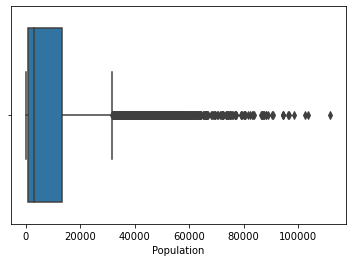

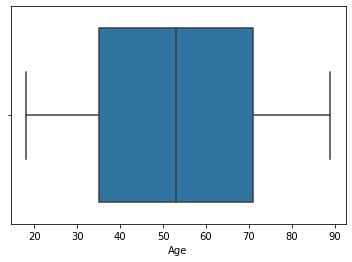

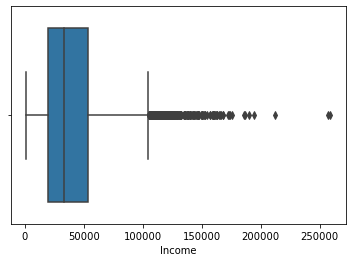

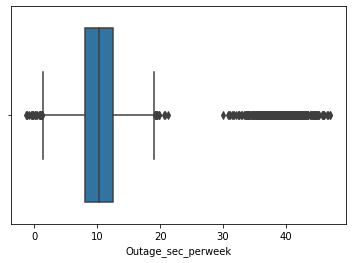

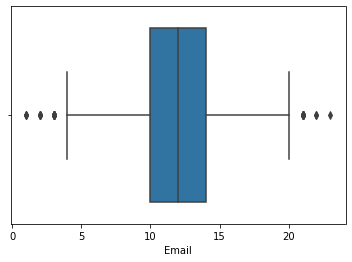

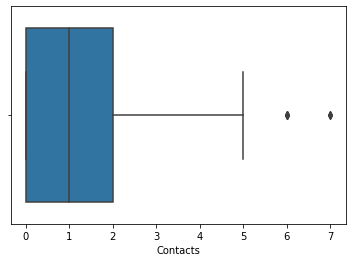

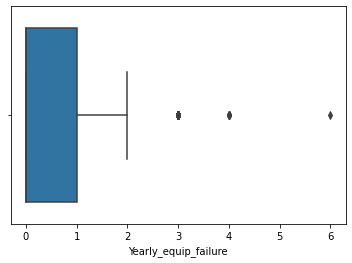

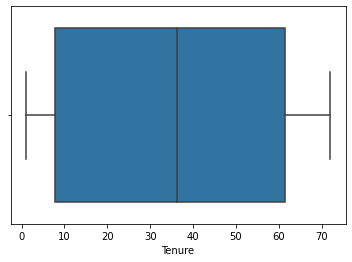

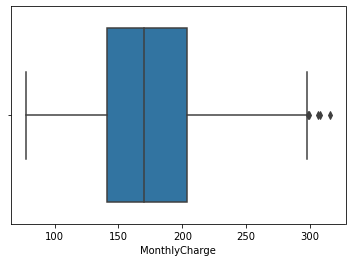

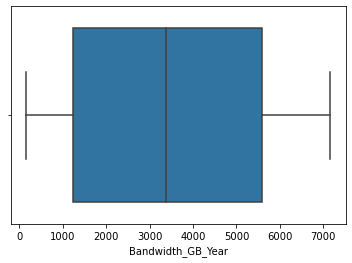

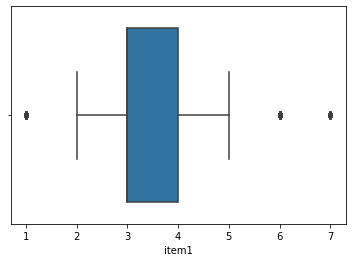

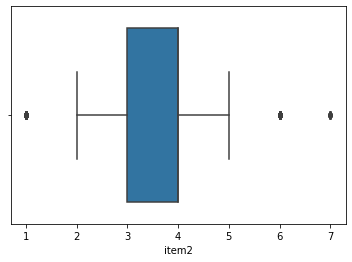

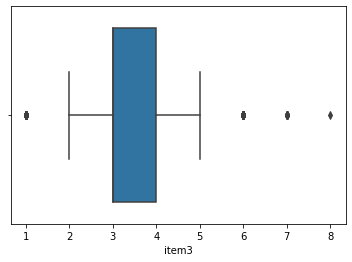

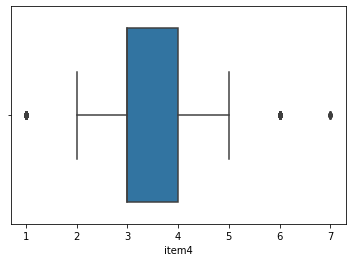

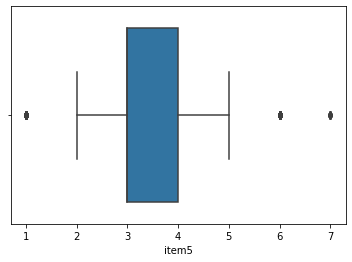

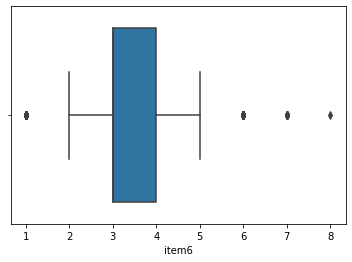

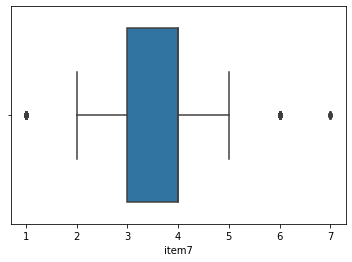

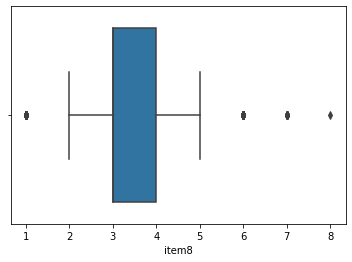

In [15]:
#visualize numeric distributions boxbplot
for i, col in enumerate(raw_churn[numeric_col_list]):
        try:
            plt.figure(i)
            sns.boxplot(raw_churn[col])
        except Exception:
            pass

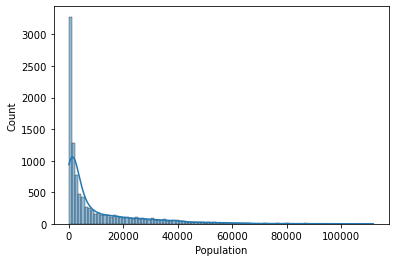

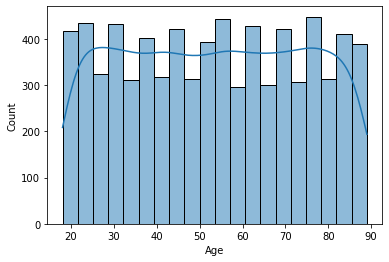

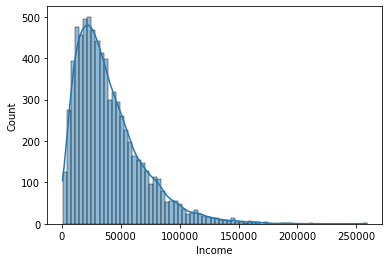

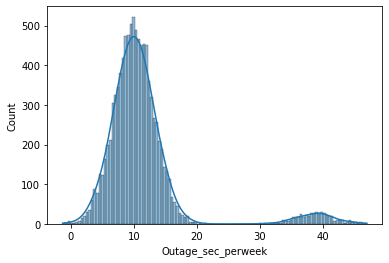

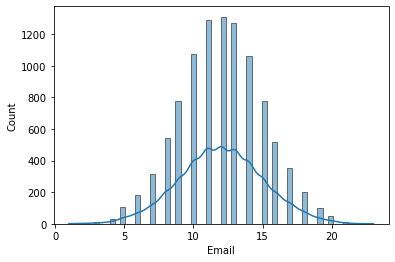

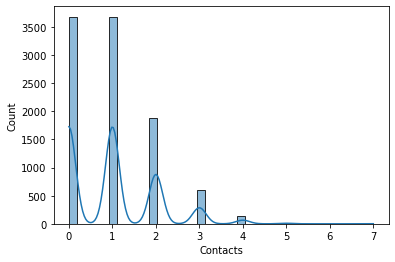

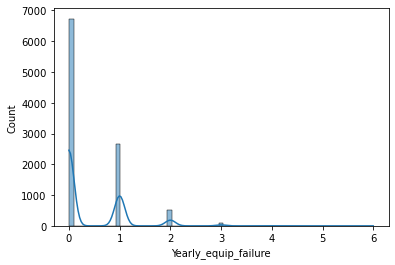

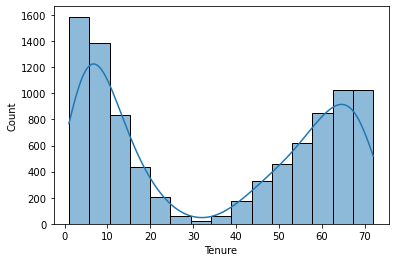

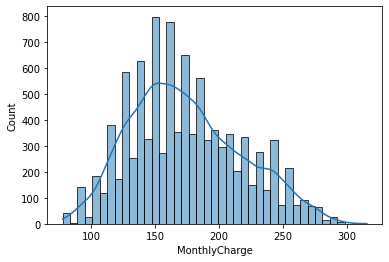

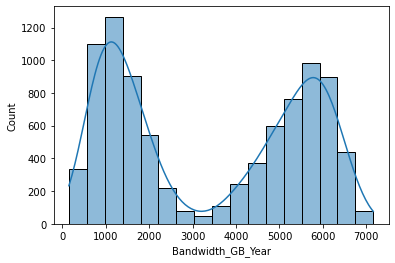

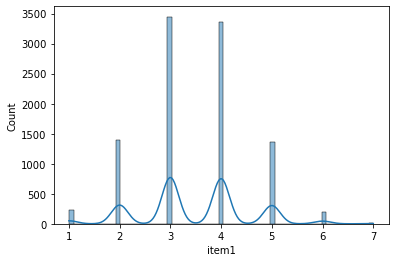

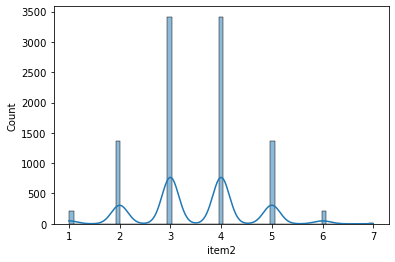

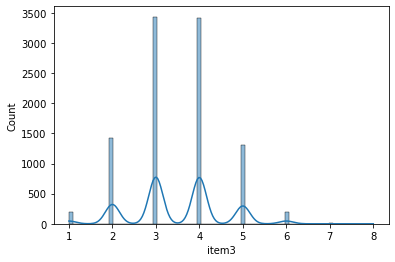

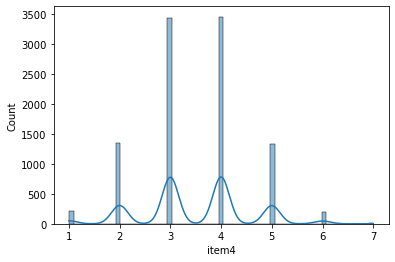

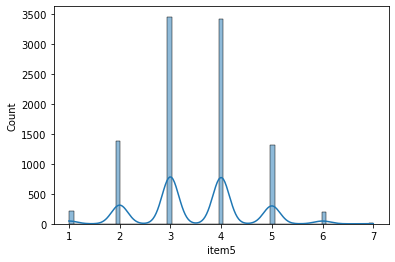

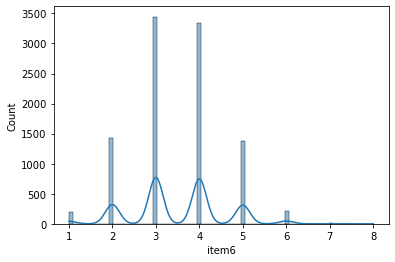

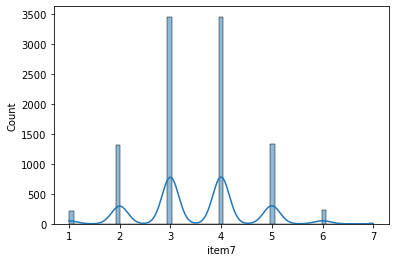

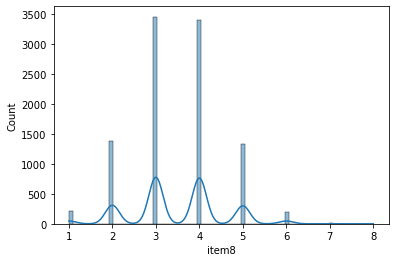

In [16]:
#visualize numeric distributions histograms
for i, col in enumerate(raw_churn[numeric_col_list]):
    try:
        plt.figure(i)
        sns.histplot(raw_churn[col], kde=True)
    except Exception:
        pass

In [17]:
#ideally, no tenure should be larger than age. If this subframe is empty then no treatment will be necessary
agetenure = ['Age', 'Tenure']
raw_churn[agetenure][raw_churn['Tenure']/12 > raw_churn['Age']]

,Age,Tenure


In [18]:
# create a list that has columns with null values
cols_with_nulls = []

for col in raw_churn:
    if raw_churn[col].isna().sum() > 0:
        cols_with_nulls.append(col)

cols_with_nulls

['Children',
 'Age',
 'Income',
 'Techie',
 'Phone',
 'TechSupport',
 'Tenure',
 'Bandwidth_GB_Year']

In [19]:
raw_churn[['City', 'State']][raw_churn['Population'] <= 100]

,City,State
0,Point Baker,AK
13,East Livermore,ME
20,Kaneville,IL
41,Sproul,PA
53,Jolley,IA
...,...,...
9779,Glentana,MT
9797,Absaraka,ND
9844,Haywood,WV
9873,Circle,AK


In [20]:
raw_churn[raw_churn['Age'] < 20].sort_values('Income', ascending=False)


,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
3953,3954,3954,W937828,29705855-df94-40a4-816d-40fe890c0da8,Diagonal,IA,Ringgold,50845,40.81871,-94.35237,861,Urban,America/Chicago,"Pilot, airline",NaN,19.0,"Some College, Less than 1 Year",Full Time,166553.10,Widowed,Female,Yes,15.700210,14,4,0,No,Month-to-month,Yes,No,DSL,Yes,No,Yes,No,No,Yes,No,Yes,Yes,Electronic Check,4.538742,142.735700,1368.093000,4,2,3,3,5,1,3,3
3022,3023,3023,A561114,1876441b-8516-43a9-bbc6-30959da5e1e9,Pasadena,TX,Harris,77505,29.64608,-95.13826,24022,Suburban,America/Chicago,Geoscientist,0.0,18.0,GED or Alternative Credential,Full Time,104539.20,Separated,Female,No,11.807730,13,2,3,No,Month-to-month,Yes,Yes,DSL,Yes,No,No,No,Yes,NaN,No,No,Yes,Electronic Check,13.908870,105.034100,NaN,6,5,4,5,5,4,6,4
465,466,466,K796504,a1253fa5-ddc2-4ee4-b63f-18d9a3191bcb,Ashland,MA,Middlesex,1721,42.25729,-71.46866,17576,Rural,America/New_York,Regulatory affairs officer,0.0,18.0,Professional School Degree,Full Time,101000.30,Never Married,Male,Yes,38.258236,10,0,1,No,Month-to-month,No,No,DSL,Yes,Yes,No,No,No,No,Yes,No,No,Electronic Check,14.580667,176.937371,2023.519366,5,5,4,2,5,4,3,3
5612,5613,5613,V571379,bb93a817-07ab-4745-8f17-e4b081629745,Larchmont,NY,Westchester,10538,40.93794,-73.75668,16545,Urban,America/New_York,"Surveyor, quantity",8.0,19.0,"9th Grade to 12th Grade, No Diploma",Full Time,93517.61,Separated,Male,No,11.677290,13,1,0,No,One year,Yes,Yes,DSL,Yes,Yes,No,No,No,No,No,No,Yes,Electronic Check,66.008690,123.785700,6319.838000,4,3,3,2,4,2,3,3
382,383,383,R753498,9ae6325d-f69f-4595-afdc-920c64944d96,Hager City,WI,Pierce,54014,44.64671,-92.56765,2080,Rural,America/Chicago,Event organiser,0.0,18.0,"Some College, 1 or More Years, No Degree",Full Time,91186.03,Separated,Female,No,9.666266,13,0,0,NaN,Two Year,No,Yes,Fiber Optic,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Bank Transfer(automatic),16.800020,244.725952,2188.672399,3,2,4,4,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9305,9306,9306,J752284,916ee499-7af2-4dc0-a45f-9912f03cf65d,Pukwana,SD,Brule,57370,43.80152,-99.16909,761,Rural,America/Chicago,Civil Service fast streamer,3.0,19.0,"9th Grade to 12th Grade, No Diploma",Retired,NaN,Never Married,Female,No,7.354714,12,2,2,No,One year,Yes,No,DSL,Yes,No,No,Yes,No,Yes,No,Yes,No,Credit Card (automatic),69.239400,162.285700,6534.389000,4,4,5,3,4,4,2,4
9437,9438,9438,Z04690,691f2105-355b-4f5e-8f25-125ba930f247,Wellesley Island,NY,Jefferson,13640,44.32223,-75.99118,362,Suburban,America/New_York,Press sub,1.0,19.0,Regular High School Diploma,Full Time,NaN,Separated,Female,No,12.754910,15,2,1,No,Two Year,Yes,Yes,Fiber Optic,Yes,No,No,No,Yes,No,No,No,No,Electronic Check,66.498110,126.061600,5661.862000,5,4,4,2,5,4,5,3
9482,9483,9483,U174484,d582dd72-b540-4a6b-8dcc-b58c2a8fae6f,Cleveland,NY,Oswego,13042,43.26755,-75.85561,2604,Rural,America/New_York,Herbalist,0.0,18.0,Nursery School to 8th Grade,Retired,NaN,Never Married,Male,No,10.478420,10,0,0,No,Month-to-month,Yes,Yes,None,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Electronic Check,71.999280,233.369900,6745.440000,3,2,3,5,3,4,2,3
9582,9583,9583,T885233,8a7ace31-c1d0-4309-9510-cb45893ce9be,Lebanon,VA,Russell,24266,36.86436,-82.11867,9179,Rural,America/New_York,Stage manager,3.0,19.0,Master's Degree,Full Time,NaN,Divorced,Female,No,11.837790,8,1,0,No,Two Year,Yes,No,Fiber Optic,Yes,No,No,No,No,No,Yes,No,No,Electronic Check,39

In [21]:
raw_churn[['Age', 'Income', 'Children', 'Employment', 'Education']][raw_churn['Age'] < 20].sort_values('Income', ascending=False)

,Age,Income,Children,Employment,Education
3953,19.0,166553.10,NaN,Full Time,"Some College, Less than 1 Year"
3022,18.0,104539.20,0.0,Full Time,GED or Alternative Credential
465,18.0,101000.30,0.0,Full Time,Professional School Degree
5612,19.0,93517.61,8.0,Full Time,"9th Grade to 12th Grade, No Diploma"
382,18.0,91186.03,0.0,Full Time,"Some College, 1 or More Years, No Degree"
...,...,...,...,...,...
9305,19.0,NaN,3.0,Retired,"9th Grade to 12th Grade, No Diploma"
9437,19.0,NaN,1.0,Full Time,Regular High School Diploma
9482,18.0,NaN,0.0,Retired,Nursery School to 8th Grade
9582,19.0,NaN,3.0,Full Time,Master's Degree


There is lots of odd data from young people. Many noted as retired or with advanced degrees.

## Part III: Data Cleaning


### D.  Summarize the data-cleaning process by doing the following:


#### 1.  Describe the findings, including all anomalies, from the implementation of the data-cleaning plan from part C.


1. ZIP/Lat/Lng are float when they should be strings as these are identifiers not numbers for mathematical operation

2. Outage time has some negative numbers. This doesn't make sense for an outage time. Being a non customer reported outlier, this is the only outlier data that can be addressed in this dataset without outside data

3. Some numerical columns with missing values: ['Children', 'Income', 'Age', 'Tenure', 'Bandwidth_GB_Year']. The missing data will be addressed using standard imputation techniques based in distribution. Detailed technique used will be individually explored below.

4. Some qualitative columns have missing data ['Techie', 'Phone', 'TechSupport']

5. Empty unnamed first column that corresponds to index should be dropped and Case Order should be set to index

6. Education levels should be standardized

7. Rename Survey `item` columns to be more descriptive

Each cleaning step will include a justification and summary to meet requirements D3-4 below.

#### 2.  Justify your methods for mitigating each type of discovered anomaly in the data set.

As stated above, missing data anomalies will be handled by the appropriate imputation technique based on type of variable.

1. Binary categorical variables with missing data will be set to "No" as a default as no data is the same as getting a No on a self reported survey. This includes ['Techie', 'Phone', 'TechSupport']
2. Due to the trickiness of numeric outliers in self reported categories, outliers will not be treated unless noted below. Very few numeric columns had major outliers.
    i. `Population` outliers, especially on the low-end match census data and will not be treated
    ii.  `Income` outliers will not be treated due to being self reported by customers
    iii. `Outage_sec_perweek` will have it's negative numbers treated via the method outlined above. The extreme outliers for outage time will be treated as valid.
    vi. No other numeric columns had outliers that needed to be addressed.

3.  No multivariate categorical data needed to be cleaned.

Before addressing the data, a copy will be made so original dataset remains intact as is.

In [22]:
# Creating a copy of the dataset to ensure original file and dataframe is not compromised during analysis.
df_clean = raw_churn.copy()

In [23]:
#verify copy worked as expected, 52 features
df_clean.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [24]:
df_clean.shape

(10000, 52)

In [25]:
df_clean.columns

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')

#### Issue 1

Change ZIP, Lat and Lng from number type to string using the inplace and astype function. These features functions as labels and not as numeric fields designed for calculations#

In [26]:
str_columns = ['Zip', 'Lat', 'Lng']
df_clean[str_columns] = df_clean[str_columns].astype(str)

In [27]:
# Test should return 'O' for Numpy object. Strings are Numpy Objects. Since the above gave no error, only one feature needs to be tested
df_clean['Zip'].dtype

dtype('O')

##### Issue 2

Outages should never be negative numbers. These items can be dropped or set to 0 depending on the amount of values with errors. Another approach could be to set the values to their absolute value but that would require more insight on  how the data was collected that is unpresent.

In [28]:
#Descriptive statistics to see outlier
df_clean['Outage_sec_perweek'].describe()

count    10000.000000
mean        11.452955
std          7.025921
min         -1.348571
25%          8.054362
50%         10.202896
75%         12.487644
max         47.049280
Name: Outage_sec_perweek, dtype: float64

In [29]:
# to determine dataloss risk, shape is used her to get the length of negative values
df_clean[df_clean['Outage_sec_perweek'] < 0].shape

(11, 52)

At only 11 values, there would be more data loss for deleting these rows than setting them to 0.

In [30]:
# Use subframe replacement to set negatives to 0
df_clean['Outage_sec_perweek'][df_clean['Outage_sec_perweek'] < 0] = 0

In [31]:
# unit test
# If min = 0, this section has been appropirately cleaned
df_clean['Outage_sec_perweek'].min()

0.0

##### Issue 2

Impute numerical nulls with appropriate values

In [32]:
# list of numeric columns with nulls. All columns are continuos with the exception of `Children` which is discrete
num_cols = ['Children', 'Income', 'Age', 'Tenure', 'Bandwidth_GB_Year']

In [33]:
# Use Pandas descritpive statistics to get a breakdown of the columns
df_clean[num_cols].describe()

,Children,Income,Age,Tenure,Bandwidth_GB_Year
count,7505.000000,7510.000000,7525.000000,9069.000000,8979.000000
mean,2.095936,39936.762226,53.275748,34.498858,3398.842752
std,2.154758,28358.469482,20.753928,26.438904,2187.396807
min,0.000000,740.660000,18.000000,1.000259,155.506715
25%,0.000000,19285.522500,35.000000,7.890442,1234.110529
50%,1.000000,33186.785000,53.000000,36.196030,3382.424000
75%,3.000000,53472.395000,71.000000,61.426670,5587.096500
max,10.000000,258900.700000,89.000000,71.999280,7158.982000


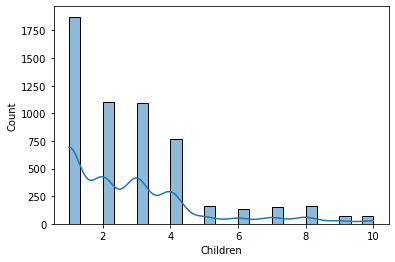

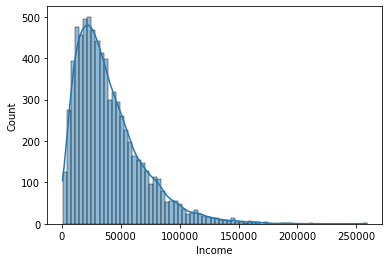

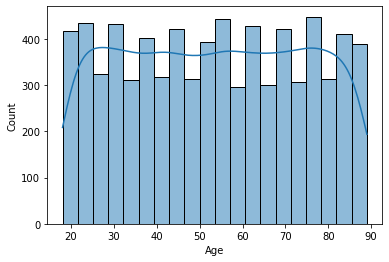

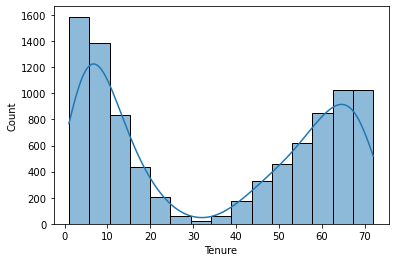

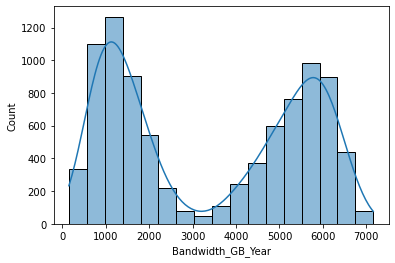

In [34]:
#visualize distributions via histogram
for i, col in enumerate(raw_churn[num_cols]):
    try:
        plt.figure(i)
        sns.histplot(raw_churn[col][raw_churn[col]>0], kde=True)
    except Exception:
        pass

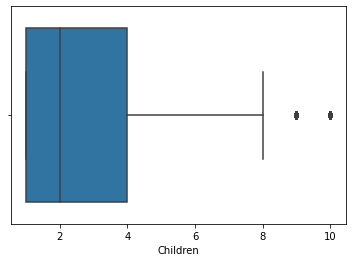

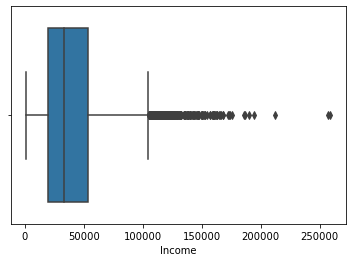

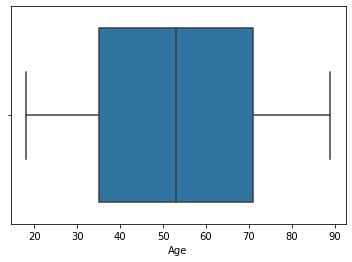

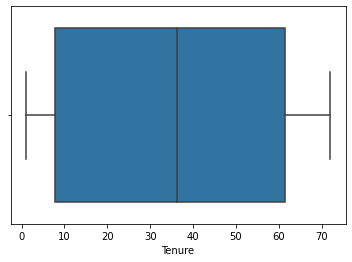

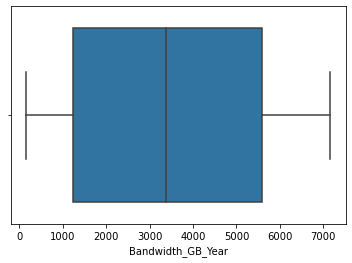

In [35]:
#visualize via boxplots
for i, col in enumerate(raw_churn[num_cols]):
    try:
        plt.figure(i)
        sns.boxplot(raw_churn[col][raw_churn[col]>0])
    except Exception:
        pass

Children and Income have a skewed normal distribution. Distributions that are skewed should be imputed with the median to reduce variance introduced via imputation in the dataset. (IBM, 2021)

In [36]:
# list for imputation
impute_median_cols = ['Children', "Income"]

# inplace replacement of null values
for col in impute_median_cols:
    df_clean[col].fillna(df_clean[col].median(), inplace = True)

In [37]:
# Unit test, should return 0
df_clean[impute_median_cols].isna().sum()

Children    0
Income      0
dtype: int64

Age has an even distriubtion. Due to the large size of data here, any number in the range of the dataset is likely to be here. The proper imputation technique for this distribution is random choice from the current dataset.

In [38]:
# setting random seed for reproducibility
random.seed(42069)

# Turning current ages present into a list
age_list = df_clean["Age"][df_clean['Age'].notna()].to_list()

In [39]:
#use random.choice to assign ages from the distribution
df_clean['Age'].fillna(pd.Series(np.random.choice(age_list, size=len(df_clean.index))), inplace=True)

In [40]:
#unit test
df_clean['Age'].isna().sum(), df_clean['Age'][df_clean['Age'] == 0].sum()

(0, 0.0)

`Bandwidth_GB_Year` and `Tenure` have a bimodal distribution. With the large sample size, random choice from the dataset is the best imputation technique.

In [41]:
# set columns for cleaning
bimodal_cols = ['Bandwidth_GB_Year', 'Tenure']

In [42]:
for col in bimodal_cols:
    df_clean[col].fillna(pd.Series(np.random.choice(df_clean[col][df_clean[col] > 0], size=len(df_clean.index))), inplace=True)

In [43]:
# Unit test
# sum of nulls should return 0

df_clean[bimodal_cols].isna().sum()

Bandwidth_GB_Year    0
Tenure               0
dtype: int64

##### Issue 3

Categorical variables, ['Techie', 'Phone', 'TechSupport'], have missing values

These missing items will be set to "No" as `Techie` is an identification the customer provides and no data affirms the user is a techie. `Phone` and `TechSupport` will also be set to No as there is no indication otherwise.

In [44]:
# list to set variables
cat_nulls = ['Techie', 'Phone', 'TechSupport']

In [45]:
#ensure values are to be Yes/No as expected

for col in cat_nulls:
    print(df_clean[col].value_counts(), len(df_clean[col]))

No     6266
Yes    1257
Name: Techie, dtype: int64 10000
Yes    8128
No      846
Name: Phone, dtype: int64 10000
No     5635
Yes    3374
Name: TechSupport, dtype: int64 10000


In [46]:
#fill na

for col in cat_nulls:
    df_clean[col].fillna('No', inplace=True)
    #built in unit test
    print(df_clean[col].value_counts(), len(df_clean[col]))

No     8743
Yes    1257
Name: Techie, dtype: int64 10000
Yes    8128
No     1872
Name: Phone, dtype: int64 10000
No     6626
Yes    3374
Name: TechSupport, dtype: int64 10000


##### Issue 4

Empty unnamed first column that corresponds to index should be dropped and Case Order should be set to index

Using drop and set index, a proper index well be made. This de-dupes data and structures it better.

In [47]:
# View Unnamed column
df_clean.iloc[:, 0:1].head()

,Unnamed: 0
0,1
1,2
2,3
3,4
4,5


In [48]:
# Drop column inplace
df_clean.drop(df_clean.columns[0],axis=1,inplace=True)

In [49]:
# drop and reset index
df_clean = df_clean.reset_index(drop=True)
df_clean.set_index('CaseOrder', inplace=True)

In [50]:
#unit test verification
df_clean.head()

,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.251,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,1.0,68.0,Master's Degree,Part Time,28561.990,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.2408,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.770,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,33186.785,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.230,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.190,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


##### Issue 5

The education levels require standardization to enhance analytical clarity. A dictionary has been developed to align the customer's education levels with the standards set by the U.S. Census. The current categorization is excessively detailed, making it challenging to derive meaningful general insights.

In [51]:
df_clean['Education'].value_counts()

Regular High School Diploma                 2421
Bachelor's Degree                           1703
Some College, 1 or More Years, No Degree    1562
9th Grade to 12th Grade, No Diploma          870
Master's Degree                              764
Associate's Degree                           760
Some College, Less than 1 Year               652
Nursery School to 8th Grade                  449
GED or Alternative Credential                387
Professional School Degree                   198
No Schooling Completed                       118
Doctorate Degree                             116
Name: Education, dtype: int64

In [52]:
education_levels ={"Master's Degree": 'Graduate Degree',
                    'Regular High School Diploma': 'Highschool',
                    'Doctorate Degree': 'Graduate Degree',
                    'No Schooling Completed': 'No Diploma',
                    "Associate's Degree": 'Associate\'s/Some College',
                    "Bachelor's Degree": 'Bachelor\'s Degree',
                    'Some College, Less than 1 Year': 'Associate\'s/Some College',
                    'GED or Alternative Credential': 'Graduate Degree',
                    'Some College, 1 or More Years, No Degree': 'Associate\'s/Some College',
                    '9th Grade to 12th Grade, No Diploma': 'No Diploma',
                    'Nursery School to 8th Grade': 'No Diploma',
                    'Professional School Degree':'Graduate Degree'}

# use mapping to the above dictionary

df_clean['Education'] = df_clean['Education'].map(education_levels)

In [53]:
# Unit Test

df_clean['Education'].value_counts()

Associate's/Some College    2974
Highschool                  2421
Bachelor's Degree           1703
Graduate Degree             1465
No Diploma                  1437
Name: Education, dtype: int64

##### Issue 6

Rename Survey `item` columns to be more descriptive. This allows easier parsing of data meaning.

In [54]:
df_clean.rename(columns = {'item1':'Timeliness',
                     'item2':'Fixes',
                     'item3':'Replacements',
                     'item4':'Reliability',
                     'item5':'Options',
                     'item6':'Respectfulness',
                     'item7':'Courteous',
                     'item8':'Listening'},
          inplace=True)

In [55]:
#unit test
df_clean.columns

Index(['Customer_id', 'Interaction', 'City', 'State', 'County', 'Zip', 'Lat',
       'Lng', 'Population', 'Area', 'Timezone', 'Job', 'Children', 'Age',
       'Education', 'Employment', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timeliness', 'Fixes', 'Replacements',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening'],
      dtype='object')

#### D5  Provide a copy of the cleaned data set.

The data has been cleaned and structured. A CSV with the cleaned structure will be saved.

In [56]:
df_clean.to_csv('churn_clean.csv')

#### D6 Summarize the limitations of the data-cleaning process.

The limitations inherent in this dataset are primarily linked to the nature of the data source. Since the data is self-reported by customers, its quality and accuracy are inherently constrained. Verification of this data would ideally require more rigorous methods, such as income verification through credit checks or employment confirmation. The imputation techniques used in this analysis, while necessary, may not be as robust as advanced methods like K-Nearest Neighbors (KNN) or decision tree classifiers (e.g., random forests). However, these methods are computationally expensive and can also be adversely affected by the quality of self-reported data. These factors significantly limit the reliability of hypothesis testing or ANOVA on the cleaned dataset.

Several quality issues arise from inconsistencies in the data, such as implausible combinations of age, employment status, and number of children. For example, there are cases where an 18-year-old customer is marked as retired with multiple children, or younger individuals are labeled as widowed or divorced. Given the self-reported nature of the data, there is no feasible method to correct these entries accurately. Even using K-Nearest Neighbors for imputation could lead to incorrect results due to these inconsistencies.

Additionally, there are anomalies in data that the firm should reasonably possess. For instance, a telecommunications provider's customer dataset should not contain null values for the services provided to each customer. This suggests a need for a reevaluation of data collection methods. Consequently, it remains challenging to ascertain whether the imputed data is truly representative of real-world conditions.

#### D7 Discuss how the limitations in part D6 affect the analysis of the question or decision from part A.

These limitations point to using this dataset only for tentative testing. For example, Age had 25% of its data missing. With that missing data assuming the distribution was valid, bias can be introduced into the dataset that would not be reflective of the real customer ages. This could also impact machine learning training in ways causing bad predictions.


## PCA

### Approach

PCA will be applied to the continuous variables in the dataset. Before applying PCA, the data will be scaled via RobustScaler. Many of the items in this dataset were self-reported causing anomalies in data quality and mismatched categorization. For example, a customer in Yamhill Oregon is noted to be a CFO but income is listed $33000. Due to these outliers and the nature of this data being a self-reported survey, providing treatment corrections to this data without another similar sample is not recommended. Instead, RobustScaler limits the effects of outliers by assuming the interquartile range of data correctly corresponds to the data distribution (Hale, 2019)

The scaled data will consist of the following continuous variables:
['Outage_sec_perweek', 'Yearly_equip_failure', 'Age', 'Contacts', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']

In [57]:
# set scaler
from sklearn.preprocessing import RobustScaler, StandardScaler

# instantiate scaler
scaler = RobustScaler()

In [58]:
# set scaling metrics
cont_cols = ['Outage_sec_perweek', 'Yearly_equip_failure', 'Age', 'Contacts', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']

In [59]:
# a copy of the clean dataframe will be made to preserve dataframe integrity

df_scaled = df_clean.copy()

In [60]:
# test copy
df_scaled.head()

,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timeliness,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.251,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,1.0,68.0,Graduate Degree,Part Time,28561.990,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.2408,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Highschool,Retired,21704.770,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Highschool,Student,33186.785,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Graduate Degree,Retired,18925.230,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Graduate Degree,Student,40074.190,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [61]:
# preview continuous variables descriptive stats as a baseline to review after scaling
df_scaled[cont_cols].describe()

,Outage_sec_perweek,Yearly_equip_failure,Age,Contacts,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.453592,0.398000,53.426600,0.994200,34.472212,174.076305,3413.214069
std,7.024842,0.635953,20.728936,0.988466,26.471578,43.335473,2184.706704
min,0.000000,0.000000,18.000000,0.000000,1.000259,77.505230,155.506715
25%,8.054362,0.000000,35.000000,0.000000,7.832862,141.071078,1239.362626
50%,10.202896,0.000000,54.000000,1.000000,35.430507,169.915400,3626.368500
75%,12.487644,1.000000,71.000000,2.000000,61.456150,203.777441,5591.796500
max,47.049280,6.000000,89.000000,7.000000,71.999280,315.878600,7158.982000


In [62]:
# apply scaler
df_scaled[cont_cols] = scaler.fit_transform(df_scaled[cont_cols])

In [63]:
#unit test scaling
df_scaled[cont_cols].describe()

,Outage_sec_perweek,Yearly_equip_failure,Age,Contacts,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.821151e-01,0.398000,-0.015928,-0.002900,-0.017871,0.066355,-0.048974
std,1.584569e+00,0.635953,0.575804,0.494233,0.493658,0.691086,0.501951
min,-2.301432e+00,0.000000,-1.000000,-0.500000,-0.642076,-1.473697,-0.797453
25%,-4.846374e-01,0.000000,-0.527778,-0.500000,-0.514658,-0.459990,-0.548430
50%,-2.003606e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.153626e-01,1.000000,0.472222,0.500000,0.485342,0.540010,0.451570
max,8.311311e+00,6.000000,0.972222,3.000000,0.681957,2.327726,0.811641


In [64]:
# save the scaled data to csv for future use
df_scaled.to_csv('Churn_scaled_data.csv')

## PCA

Now PCA will be applied to the continuous data

In [65]:
from sklearn.decomposition import PCA

#create a dataframe with the scaled continuous variables

df_pca = df_scaled[cont_cols]
df_pca.reset_index(drop=True, inplace=True)
df_pca.head()

,Outage_sec_perweek,Yearly_equip_failure,Age,Contacts,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.728654,1.0,0.388889,-0.5,-0.534003,0.024469,-0.625359
1,0.408646,1.0,-0.750000,-0.5,-0.639159,1.164676,-0.649151
2,0.009636,1.0,-0.111111,-0.5,-0.366937,-0.167048,-0.361099
3,1.128576,0.0,-0.166667,0.5,-0.342077,-0.792039,-0.335856
4,-0.280284,1.0,0.805556,0.5,-0.629569,-0.305458,-0.770804


In [66]:
pca = PCA(7)
X_pca = pca.fit_transform(df_pca)

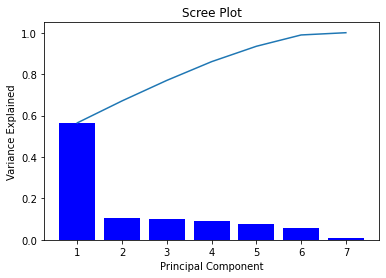

In [67]:
PC_values = np.arange(pca.n_components_) + 1

vals = pca.explained_variance_ratio_
cumvals = np.cumsum(vals)
ax = plt.subplot(111)

plt.bar(PC_values, pca.explained_variance_ratio_, color='blue')
ax.plot(PC_values, cumvals)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

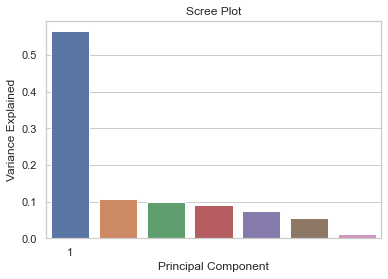

In [68]:
PC_values = np.arange(pca.n_components_) + 1

sns.set_theme(style="whitegrid")
ax = sns.barplot(x = PC_values, y = pca.explained_variance_ratio_)

n = 7  # Keeps every 7th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

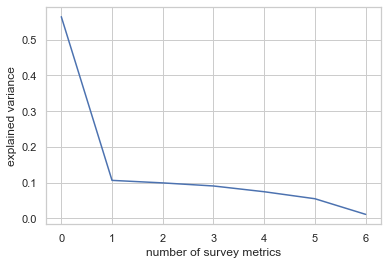

In [69]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of survey metrics')
plt.ylabel('explained variance')
plt.show()

In [70]:
pca.explained_variance_ratio_[0]

0.5647280857099315

In [71]:
# function to find PCA weights

def weight(x,n,df):
    pca_weights = pd.DataFrame(x.components_, columns=(df.columns))
    weights = pca_weights.iloc[n].sort_values(ascending=False)
    return weights

In [72]:
len(df_pca.columns)

7

### E1. List the principal components in the data set.

In [73]:
for i in range(len(df_pca.columns)):
    print(f'Component {i} explains {int(round(pca.explained_variance_ratio_[i],2) * 100)}% of the data with these features contributing the most info:\n ', weight(pca, i, df_pca), '\n')

Component 0 explains 56% of the data with these features contributing the most info:
  Outage_sec_perweek      0.997491
MonthlyCharge           0.069889
Yearly_equip_failure    0.008045
Bandwidth_GB_Year       0.005600
Tenure                  0.003149
Contacts               -0.000587
Age                    -0.004541
Name: 0, dtype: float64 

Component 1 explains 11% of the data with these features contributing the most info:
  MonthlyCharge           0.908426
Bandwidth_GB_Year       0.312809
Tenure                  0.268556
Age                     0.016043
Contacts                0.006444
Yearly_equip_failure   -0.011150
Outage_sec_perweek     -0.066086
Name: 1, dtype: float64 

Component 2 explains 10% of the data with these features contributing the most info:
  Tenure                  0.639399
Bandwidth_GB_Year       0.635098
Yearly_equip_failure    0.152766
Outage_sec_perweek      0.021324
Contacts                0.000136
Age                    -0.032226
MonthlyCharge          -0.4

The principal components that explain 86% of the data are as follows:

1. Outage seconds per week
2. Monthly Charge
3. Yearly Equipment failure

### E4. Describe how you identified the principal components of the data set.

Using Sklearn's PCA and a subset of the dataframe with continuous variables, I was able to use a cumaltive some bar chart and screeplot to visualize component variance explanation of the components. From there, I was able to use a function to read out the explanation of variance that a component has to the entire dataset as well as the features in each component in how they contribute to variance in the data.

### 5. Describe how the organization can benefit from the results of the PCA

PCA can help identify the numeric variables that account the most for variance in the data. The primary benefit is reducing dimensions of large datasets without losing too much information from a column. Reducing dimensions allows for the dataset to be less computationally expensive while still being accurate/

## <center> References

(2021, August 17). Imputing or Filling Missing Values. Retrieved from IBM SPSS Documentation: ibm.com/docs/en/spss-modeler/SaaS?topic=values-imputing-filling-missing

Kumar, A. (2021, October 3). Python – Replace Missing Values with Mean, Median & Mode. Retrieved from Vitaflux: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

Yıldırım, S. (2020, March 2). A Practical Guide for Data Analysis with Pandas. Retrieved from Toward Data Science: https://towardsdatascience.com/a-practical-guide-for-data-analysis-with-pandas-e24e467195a9

In [74]:
os.system('jupyter nbconvert --to html WGUd206.ipynb')

0